# Examples

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## View all SNOTEL & CCSS stations

In [2]:
all_stations = gpd.read_file('https://raw.githubusercontent.com/egagli/snotel_tools/main/all_stations.geojson').set_index('code')

In [3]:
all_stations

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,Modoc,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2100-01-01,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Kane,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2100-01-01,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Madison,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2100-01-01,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Matanuska-Susitna,Alaska,190205051106,05VPJ,NaN,2014-08-28,2100-01-01,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,King,Washington,171100100501,10TET,Cascade Range,1994-09-01,2100-01-01,POINT (-121.69847 47.77957)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.360000,41.043980,-122.480103,Shasta,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2024-02-07,POINT (-122.48010 41.04398)
SLI,Slide Canyon,CCSS,2804.160000,38.091234,-119.431881,Tuolumne,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2024-02-07,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.080000,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590)


In [4]:
all_stations.astype(dict(beginDate=str, endDate=str)).explore(column='network',cmap='bwr')

## Check out the SNOTEL station at Paradise, WA

In [5]:
station_id = '679_WA_SNTL'
paradise_snotel = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_tools/main/data/{station_id}.csv',index_col='datetime', parse_dates=True)

In [6]:
paradise_snotel

,TAVG,TMIN,TMAX,SNWD,WTEQ,PRCPSA
datetime,,,,,,
1988-09-30,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-01,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-02,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-03,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-04,0.0,0.0,0.0,NaN,0.000000,0.00000
...,...,...,...,...,...,...
2024-01-31,5.3,3.4,9.2,1.854199,0.901699,0.02032
2024-02-01,2.6,0.8,5.4,1.828799,0.896620,0.00508
2024-02-02,0.8,-1.8,3.3,1.828799,0.883920,0.00000


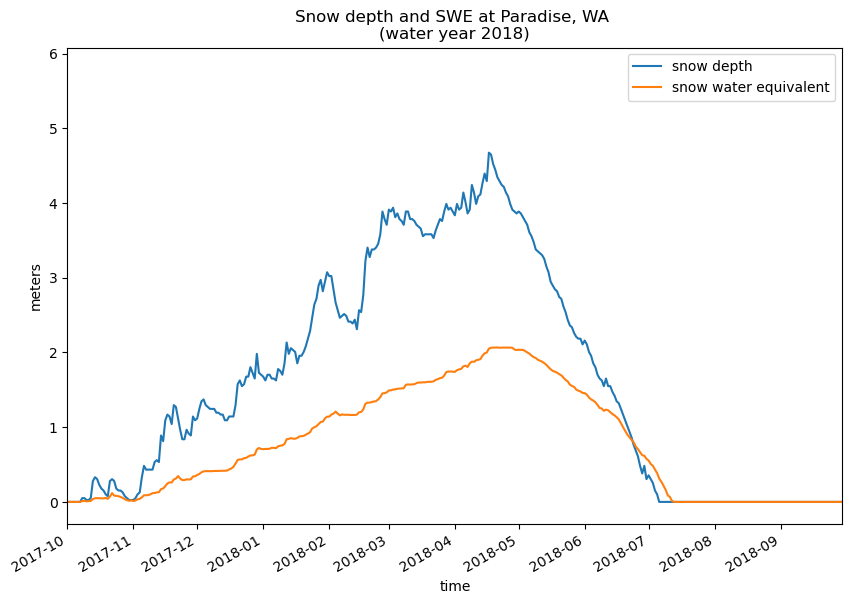

In [7]:
f,ax=plt.subplots(figsize=(10,7))

paradise_snotel['SNWD'].plot(ax=ax,label='snow depth')
paradise_snotel['WTEQ'].plot(ax=ax,label='snow water equivalent')

ax.set_xlim(pd.to_datetime(['2017-10-01','2018-09-30']))

ax.set_xlabel('time')
ax.set_ylabel('meters')
ax.set_title('Snow depth and SWE at Paradise, WA \n(water year 2018)')
ax.legend()

## Check out a list of sites

In [18]:
site_list = ['356_CA_SNTL','BLK']

site_dict = {}

for site in site_list:
    tmp = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_tools/main/data/{site}.csv',index_col='datetime',parse_dates=True)['WTEQ']
    site_dict[site] = tmp

sites_wteq = pd.DataFrame.from_dict(site_dict).dropna()

In [19]:
sites_wteq

,356_CA_SNTL,BLK
datetime,,
1980-10-01,0.00000,0.00000
1980-10-02,0.00000,0.00000
1980-10-03,0.00000,0.00000
1980-10-04,0.00000,0.00000
1980-10-05,0.00000,0.00000
...,...,...
2024-01-31,0.23876,0.23876
2024-02-01,0.24130,0.24130
2024-02-02,0.25654,0.25654


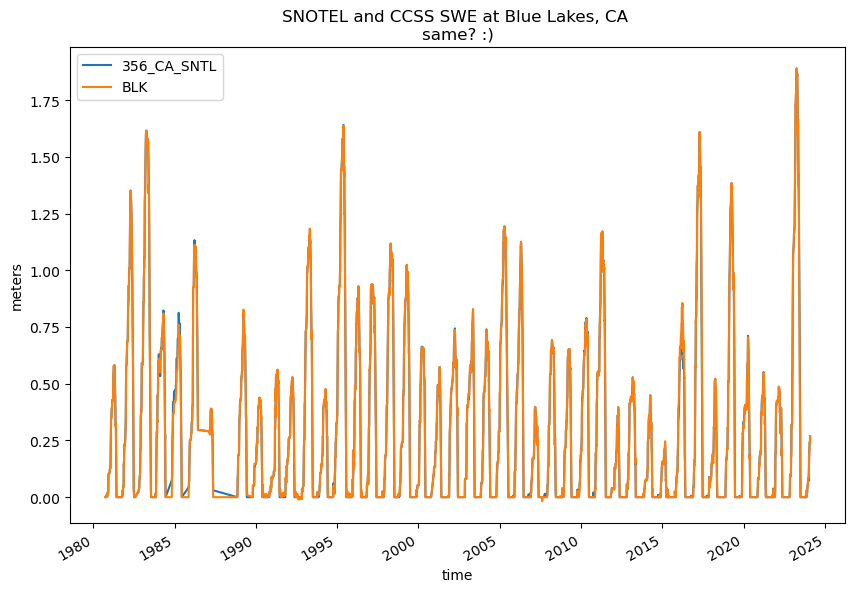

In [23]:
f,ax=plt.subplots(figsize=(10,7))

sites_wteq.plot(ax=ax)

ax.set_xlabel('time')
ax.set_ylabel('meters')
ax.set_title('SNOTEL and CCSS SWE at Blue Lakes, CA \nsame? :)')
ax.legend()

In [24]:
sites_wteq.corr()

,356_CA_SNTL,BLK
356_CA_SNTL,1.000000,0.999052
BLK,0.999052,1.000000


## Let's check out a larger set of sites

In [12]:
all_stations

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,Modoc,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2100-01-01,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Kane,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2100-01-01,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Madison,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2100-01-01,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Matanuska-Susitna,Alaska,190205051106,05VPJ,NaN,2014-08-28,2100-01-01,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,King,Washington,171100100501,10TET,Cascade Range,1994-09-01,2100-01-01,POINT (-121.69847 47.77957)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.360000,41.043980,-122.480103,Shasta,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2024-02-07,POINT (-122.48010 41.04398)
SLI,Slide Canyon,CCSS,2804.160000,38.091234,-119.431881,Tuolumne,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2024-02-07,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.080000,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590)


In [13]:
ccss_stations = all_stations[all_stations['network']=='CCSS']

In [ ]:
site_dict = {}

for site in ccss_stations.index:
    try:
        tmp = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_tools/main/data/{site}.csv',index_col='datetime',parse_dates=True)['SNWD']
        site_dict[site] = tmp
    except:
        print(f'failed to retrieve {site}')

ccss_sites_snwd = pd.DataFrame.from_dict(site_dict).dropna()

In [ ]:
ccss_sites_snwd

In [ ]:
ccss_sites_snwd.corr()